In [1]:
'''
Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather
data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.
'''

'\nInteracting with Web APIs\nProblem Statement: Analyzing Weather Data from OpenWeatherMap API\nDataset: Weather data retrieved from OpenWeatherMap API\nDescription: The goal is to interact with the OpenWeatherMap API to retrieve weather\ndata\nfor a specific location and perform data modeling and visualization to analyze weather\npatterns over time.\nTasks to Perform:\n1. Register and obtain API key from OpenWeatherMap.\n2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for\na specific location.\n3. Extract relevant weather attributes such as temperature, humidity, wind speed, and\nprecipitation from the API response.\n4. Clean and preprocess the retrieved data, handling missing values or inconsistent\nformats.\n5. Perform data modeling to analyze weather patterns, such as calculating average\ntemperature, maximum/minimum values, or trends over time.\n6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or\nscatter pl

In [2]:
import sys
!{sys.executable} -m pip install requests


In [1]:
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
api_key = "0d69e8eb88f4df5048be6b4caadc3113"
location = "pune"  
url = f"http://api.openweathermap.org/data/2.5/forecast?q={location}&appid={api_key}&units=metric"

In [3]:
weather_data = []

In [4]:
# Make the API request to get forecast data (for the next 5 days, 3-hour intervals)
response = requests.get(url)
data = response.json()

In [5]:
# Loop through the forecast data
for entry in data['list']:
    # Extract the weather information for each 3-hour interval
    date = datetime.datetime.fromtimestamp(entry['dt'])  # Convert the timestamp to a datetime
    temp = entry['main']['temp']
    humidity = entry['main']['humidity']
    wind_speed = entry['wind']['speed']
    precipitation = entry.get('rain', {}).get('3h', 0)  # If no rain data, set it to 0
    lat = data['city']['coord']['lat']
    lon = data['city']['coord']['lon']
    
    # Append the data to the list
    weather_data.append({
        'date': date,
        'temp': temp,
        'humidity': humidity,
        'wind_speed': wind_speed,
        'precipitation': precipitation,
        'latitude': lat,
        'longitude': lon
    })

In [6]:
# Convert the list to a pandas DataFrame
weather_df = pd.DataFrame(weather_data)

In [7]:
# Display the weather DataFrame
weather_df.head()

,date,temp,humidity,wind_speed,precipitation,latitude,longitude
0,2025-11-13 02:30:00,19.81,64,1.32,0,18.5196,73.8553
1,2025-11-13 05:30:00,18.25,61,1.42,0,18.5196,73.8553
2,2025-11-13 08:30:00,20.16,52,2.14,0,18.5196,73.8553
3,2025-11-13 11:30:00,24.98,39,3.16,0,18.5196,73.8553
4,2025-11-13 14:30:00,27.25,32,2.11,0,18.5196,73.8553


In [8]:
weather_df.shape

(40, 7)

In [12]:
# Data Cleaning and Preprocessing
# 5. Perform data modeling to analyze weather patterns, such as calculating average
# temperature, maximum/minimum values, or trends over time.

temp_avg = weather_df['temp'].mean()
temp_max = weather_df['temp'].max()
temp_min = weather_df['temp'].min()
print('Average temperature :',temp_avg)
print('Maximum temperature :',temp_max)
print('Minimum temperature :',temp_min)

Average temperature : 23.09925
Maximum temperature : 29.67
Minimum temperature : 17.79


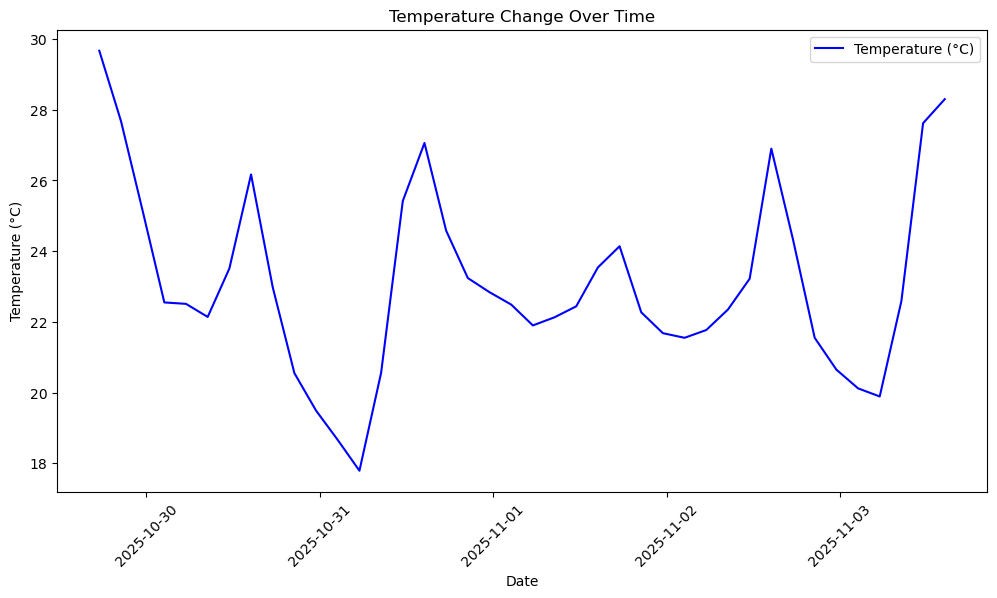

In [13]:
# Data Visulization
# a. Temperature Change Over Time (Line Plot):

# Plot temperature change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_df, x='date', y='temp', label='Temperature (°C)', color='blue')
plt.title('Temperature Change Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

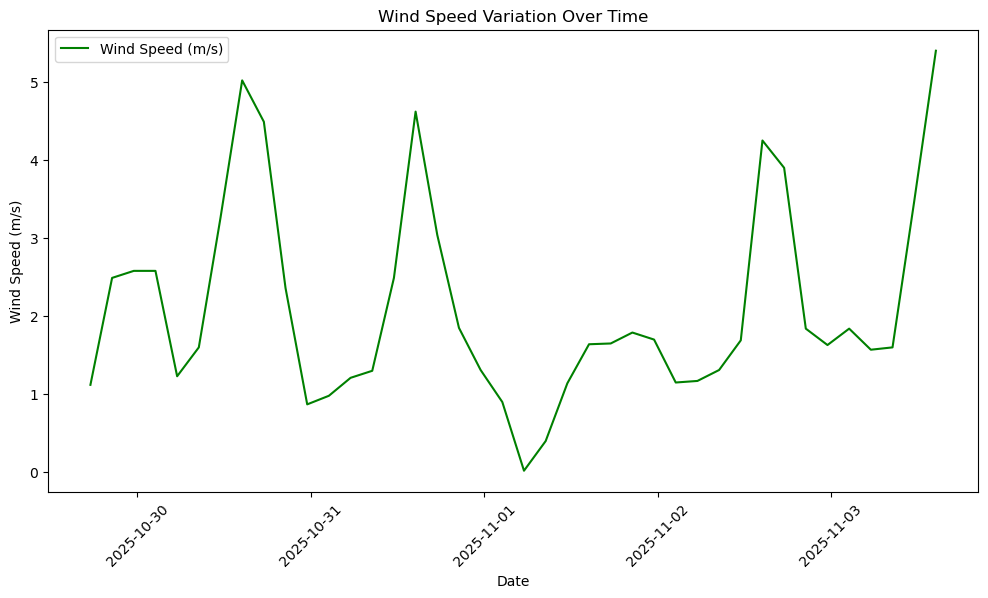

In [14]:
# b. Wind Speed Variation (Line Plot):
# Plot wind speed change over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_df, x='date', y='wind_speed', label='Wind Speed (m/s)', color='green')
plt.title('Wind Speed Variation Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

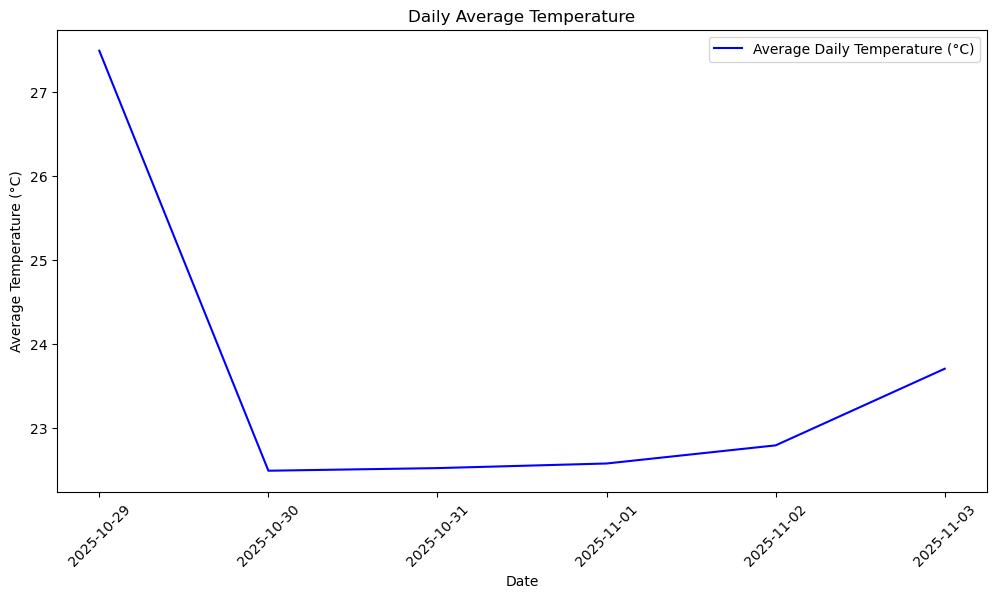

In [15]:
# Data Aggregation by Time Period
# a. Daily Average Temperature:

# Group data by date and calculate daily average temperature
daily_avg_temp = weather_df.groupby(weather_df['date'].dt.date)['temp'].mean().reset_index()

# Plot daily average temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_avg_temp, x='date', y='temp', label='Average Daily Temperature (°C)', color='blue')
plt.title('Daily Average Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

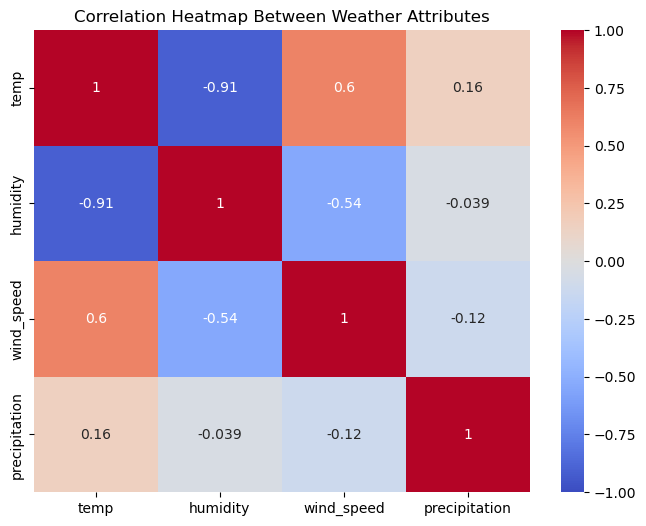

In [16]:
# 4. Correlation Between Weather Attributes
# Calculate correlation matrix between weather attributes
corr = weather_df[['temp', 'humidity', 'wind_speed', 'precipitation']].corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap Between Weather Attributes')
plt.show()

In [37]:
import folium

# Create a base map centered around the average coordinates
m = folium.Map(location=[weather_df['latitude'].mean(), weather_df['longitude'].mean()], zoom_start=6)

# Add a marker for each location
for _, row in weather_df.iterrows():
    popup_text = (
        f"Date: {row['date']}"
        f"Temp: {row['temp']} °C"
        f"Humidity: {row['humidity']} %"
        f"Wind Speed: {row['wind_speed']} m/s"
        f"Precipitation: {row['precipitation']} mm"
    )

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=6,
        color='blue',
        fill=True,
        popup=popup_text
    ).add_to(m)

# Display or save the map
m.save("weather_map.html")
print("✅ Map saved as weather_map.html — open it in your browser to view.")


✅ Map saved as weather_map.html — open it in your browser to view.


In [24]:
import pandas as pd

# Ensure date column is in datetime format
weather_df['date'] = pd.to_datetime(weather_df['date'])

# Define 3 seasons
def season(month):
    if month in [3, 4, 5]: return 'Summer'
    elif month in [6, 7, 8, 9]: return 'Monsoon'
    else: return 'Winter'

# Add season column
weather_df['season'] = weather_df['date'].dt.month.apply(season)

# Aggregate (average) by season
seasonal_summary = weather_df.groupby('season').mean()

print(seasonal_summary)


                      date      temp  humidity  wind_speed  precipitation  \
season                                                                      
Winter 2025-11-01 04:00:00  23.09925     80.95      2.1115          0.118   

        latitude  longitude  
season                       
Winter   18.5196    73.8553  


In [29]:
import pandas as pd

# Convert to datetime
weather_df['date'] = pd.to_datetime(weather_df['date'])

# 📅 Daily average
daily_summary = weather_df.groupby(weather_df['date'].dt.date).mean(numeric_only=True)

# 🗓️ Monthly average
monthly_summary = weather_df.groupby(weather_df['date'].dt.to_period('M')).mean(numeric_only=True)


In [30]:
daily_summary

,temp,humidity,wind_speed,precipitation,latitude,longitude
date,,,,,,
2025-10-29,27.496667,62.333333,2.063333,0.41000,18.5196,73.8553
2025-10-30,22.487500,84.250000,2.676250,0.25000,18.5196,73.8553
2025-10-31,22.518750,76.875000,2.100000,0.00000,18.5196,73.8553
2025-11-01,22.573750,85.000000,1.155000,0.17125,18.5196,73.8553
2025-11-02,22.790000,85.250000,2.117500,0.00000,18.5196,73.8553
2025-11-03,23.704000,80.000000,2.776000,0.02400,18.5196,73.8553


In [31]:
monthly_summary

,temp,humidity,wind_speed,precipitation,latitude,longitude
date,,,,,,
2025-10,23.291579,77.684211,2.336842,0.170000,18.5196,73.8553
2025-11,22.925238,83.904762,1.907619,0.070952,18.5196,73.8553
